# Big data course 
@Liubov, Marc

Second seminar on network theory and applications.

# Network measures

Centrality measures for a given network are described in https://en.wikipedia.org/wiki/Centrality 

Examples of possible local measures: 
1. `degree_centrality(G)`, the degree centrality for nodes.
2. `in_degree_centrality(G)`, the in-degree centrality for nodes.
3. `out_degree_centrality(G)`, the out-degree centrality for nodes
4. `betweenness_centrality(G)`, the shortest-path betweenness centrality for nodes. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through 
5. ` closeness_centrality(G)`, closeness centrality for nodes.  Closeness centrality  of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes
6. `eigenvector_centrality(G)`,  the eigenvector centrality for the graph G. Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is $x$: $Ax = \lambda x$, where $\lambda$ is eigenvalue.

Other network measures are described in the networkx documentation https://networkx.github.io/documentation/stable/reference/generators.html 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Network measures for given networks


## Algorithm for measures calculation and visualisation
1. Let us first generate a network using networkx standard networks.
2. Calculate measures for each node or link of a network
3. Plot a network with "nx.draw" https://networkx.github.io/documentation/stable/reference/drawing.html where each node has color according to the node measure
4. Plot a network degree sequence as diagram

**Tips:**
Be aware of the networkx classes, e.g. `dictionary`, `list` etc.

<class 'networkx.classes.reportviews.DegreeView'>


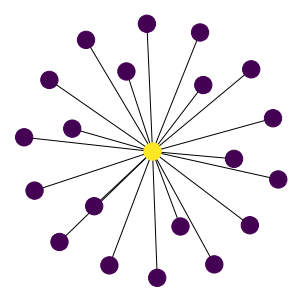

In [15]:

# 1. Generate a network
G = nx.star_graph(20)

# 2. Calculate measures for each node
deg = nx.degree_centrality(G) # gives a dictionary!!!
print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values
 


# 3. Draw network with node colors defined by degree
plt.figure(figsize = (4, 4)) # set size of figure
node_color = degree_sequence # assign node colors
nx.draw(G, node_color = degree_sequence)



## Additional information to the plots
Now we add colorbars for plots.

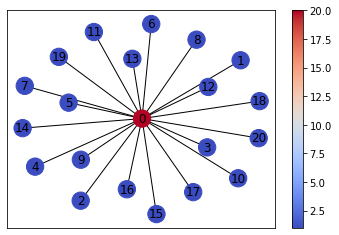

In [7]:
# we choose max and min degree for colorbars
vmin = min(degree_sequence) #.min() 
vmax = max(degree_sequence) # .max()
cmap = plt.cm.coolwarm

# we can choose another layouts: layout = nx.fruchterman_reingold_layout(G)


# we plot network with colorbars
nx.draw_networkx(G, node_color=degree_sequence,
                 cmap=cmap, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)



## Try to plot network measures for your network!

1. For a network of your choice try to find network measure which is meaningful.
2. Visualise network measures for a network of your choise.

## Examples of network measures 

dict_values([0.029026269377146568, 0.03809059686252668, 0.05601039636127355, 0.023670286828181564, 0.04280144806460596, 0.0, 0.009746588693957114, 0.08958507379560011, 0.014814814814814814, 0.1449874686716792, 0.06022927689594356, 0.047707231040564374, 0.02719762368885176, 0.11251740462266778, 0.03235867446393762, 0.046017822333611805, 0.061343172746681524, 0.04008168569572078, 0.010679476468950152, 0.06050310962591663])


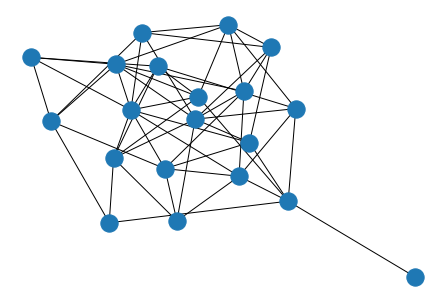

In [27]:


G_er = nx.erdos_renyi_graph(20, 0.3)
betw = nx.betweenness_centrality(G_er) #returns dictionary
betw_sequence = np.array(betw.values()) # gives array of degree values
 
print(betw_sequence)
nx.draw(G_er)
#nx.draw_networkx(G_er, node_color = betw_sequence)
plt.show()


## Analysis of a network with local measures
We plot the distributions (sorted values of local measures) for `degree`, `clustering`, `betweenness` and other measures. Please use other setups for the plotting the histograms. 

The networks are quite messy and full of links, therefore we perform some simple network analysis on them.
The structure of G can be analyzed using various graph-theoretic functions such as: linear ones (degree), non-linear ones (betweenness etc.)

In [2]:
import numpy as np
import seaborn


def measures_for_network(G):
    # -*- coding: utf-8 -*-
    
    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()
    
    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=20)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()    
    
    
    seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=20)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    seaborn.distplot(list(nx.clustering(G).values()), bins=20)
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()
    
    print('calculating global measures')
    
    print('average neighbor degree', nx.average_degree_connectivity(G))
    
    print('average neighbor degree', nx.average_neighbor_degree(G))
    
    print('average clustering')
    avclus = nx.average_clustering(G)
    #print(avclus)
    
    
    
    components = nx.connected_components(G)
    #print('components', components)
    #[[1, 2, 3], ['spam']]
    
    
    nx.clustering(G)
    #{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}
    
    
    nx.degree(G)
    #Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}



drawing measures for graph


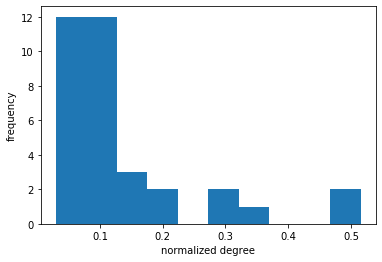

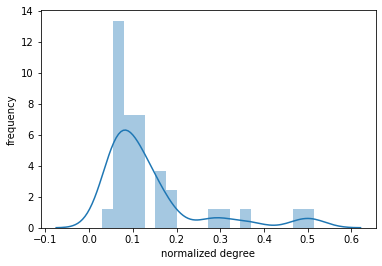

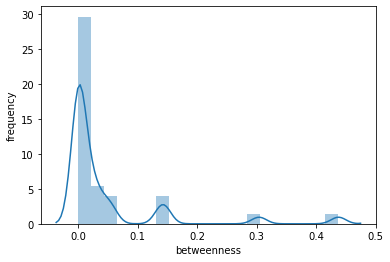

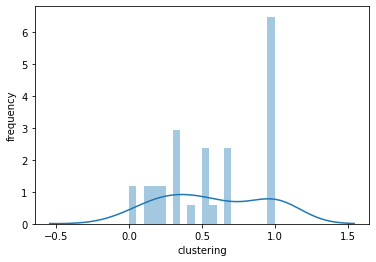

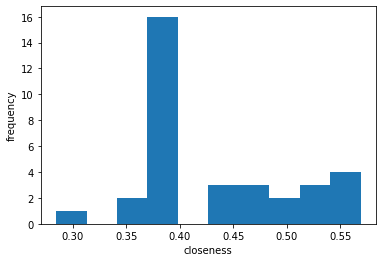

calculating global measures
average neighbor degree {16: 4.3125, 9: 5.777777777777778, 10: 6.6, 6: 8.333333333333334, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 2: 12.409090909090908, 1: 16.0, 12: 5.083333333333333, 17: 3.823529411764706}
average neighbor degree {0: 4.3125, 1: 5.777777777777778, 2: 6.6, 3: 7.666666666666667, 4: 7.666666666666667, 5: 6.25, 6: 6.25, 7: 10.25, 8: 11.8, 9: 13.5, 10: 7.666666666666667, 11: 16.0, 12: 11.0, 13: 11.6, 14: 14.5, 15: 14.5, 16: 4.0, 17: 12.5, 18: 14.5, 19: 14.0, 20: 14.5, 21: 12.5, 22: 14.5, 23: 8.0, 24: 4.333333333333333, 25: 4.666666666666667, 26: 10.5, 27: 8.75, 28: 11.0, 29: 9.0, 30: 10.75, 31: 9.0, 32: 5.083333333333333, 33: 3.823529411764706}
average clustering


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.algorithms.community import greedy_modularity_communities

G = nx.karate_club_graph()

measures_for_network(G)

## Community structure

The function `greedy_modularity_communities(G, weight=None)[source]`
finds communities in graph using Clauset-Newman-Moore greedy modularity maximization. This method currently supports the Graph class and does not consider edge weights.

In [2]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

G = nx.karate_club_graph()
c = list(greedy_modularity_communities(G))
sorted(c[0])

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

## Visualise community structure 
There are different algorithms for computing and visualising community strutures. Choose your favourite and try it out:



1. Communities structures 
https://networkx.github.io/documentation/latest/reference/algorithms/community.html
`K-Clique` to calculate k_clique_communities(G, k[, cliques]) - find k-clique communities in graph using the percolation method.
2. Modularity-based communities 
`greedy_modularity_communities`
https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities




## Try to generate your own network!
You can  create your own network by giving to networkx a matrix or edgelist, or adding nodes and links.


## Algorithm
1. We first generate a network using matrix, edgelist or load function.
2. Then we visualise this network with the simplest function "draw" https://networkx.github.io/documentation/stable/reference/drawing.html
